## Breast Cancer Prediction using Machine Learning

<b>We aim to predict the Stage of Breast Cancer - M (Malignant) or B (Bengin) <br><br></b>
Attribute Information:<br><br>
1) ID number <br> 
2) Diagnosis (M = Malignant, B = Benign) <br>

3-32 Ten real-valued features are computed for each cell nucleus: <br>

a) radius (mean of distances from center to points on the perimeter) <br>
b) texture (standard deviation of gray-scale values) <br>
c) perimeter <br>
d) area <br>
e) smoothness (local variation in radius lengths) <br>
f) compactness (perimeter^2 / area - 1.0) <br>
g) concavity (severity of concave portions of the contour) <br>
h) concave points (number of concave portions of the contour) <br>
i) symmetry <br>
j) fractal dimension ("coastline approximation" - 1) <br>

Attributes (3-32) are divided into three parts each conataining ten features: <br>

- Mean (3-13) <br>
- Stranded Error(13-23) <br>
- Worst(23-32) <br>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import time
%matplotlib inline

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from sklearn import metrics

In [2]:
import warnings
warnings.simplefilter('ignore')

## Load the Data

In [3]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data visualisation and pre-processing

In [4]:
data.drop('id', axis=1, inplace=True) #dropping the 'id' column
data.drop('Unnamed: 32', axis=1, inplace=True)

In [5]:
print("Rows:", data.shape[0])
print("Columns:", data.shape[1])

Rows: 569
Columns: 31


In [6]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data exploration

In [7]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


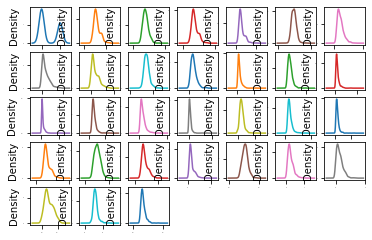

In [8]:
data.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

In [9]:
print(data.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


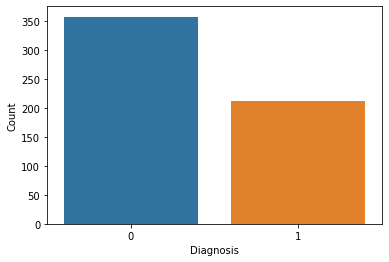

In [10]:
sns.countplot(data['diagnosis'])
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

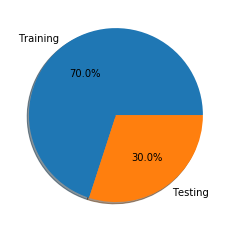

Training set (398, 31)
Testing set (171, 31)


In [11]:
# split our data into train and test
traindf, testdf = train_test_split(data, test_size = 0.3)
labels = ['Training', 'Testing']
plt.pie([70, 30], labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()
print("Training set", traindf.shape)
print("Testing set", testdf.shape)

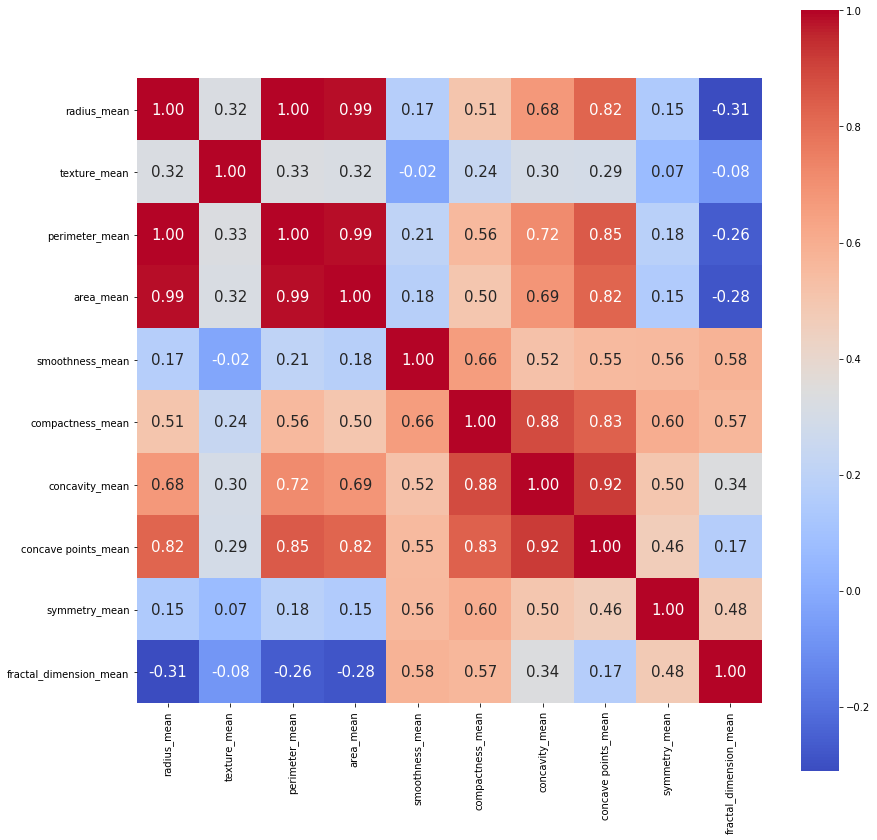

In [12]:
features_mean= list(data.columns[1:11])
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') 
plt.show()

## Observations
- The radius, perimeter and area are highly correlated as expected from their mathematical relation. Therefore, we will consider anyone of them.
- Similarly, compactness, concavity and concavepoint are highly correlated. Hence, we will consider compactness_mean only.<br>
Therefore, the selected parameters are perimeter_mean, texture_mean, compactness_mean and symmetry_mean.

## Model Classification

In [13]:
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)

In [14]:
# Generic function for making a classification model and accessing the performance. 
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])

    #Make predictions on training set:
    predictions = model.predict(data[predictors])

    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kfold = KFold(n_splits=5)
    error = []
    for train, test in kfold.split(data):
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])

        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors], data[outcome])

## Logistic Regression

In [15]:
predictors = ['texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean']
outcome = 'diagnosis'
model = LogisticRegression()
classification_model(model, traindf, predictors, outcome)

Accuracy : 90.704%
Cross-Validation Score : 86.250%
Cross-Validation Score : 89.375%
Cross-Validation Score : 90.417%
Cross-Validation Score : 90.597%
Cross-Validation Score : 90.706%


## Decision Tree

In [16]:
predictors = ['texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean']
model = DecisionTreeClassifier()
classification_model(model, traindf, predictors, outcome)

Accuracy : 100.000%
Cross-Validation Score : 86.250%
Cross-Validation Score : 87.500%
Cross-Validation Score : 87.500%
Cross-Validation Score : 89.676%
Cross-Validation Score : 89.209%


In [17]:
predictors = ['texture_mean']
model = DecisionTreeClassifier()
classification_model(model, traindf, predictors, outcome)

Accuracy : 96.231%
Cross-Validation Score : 62.500%
Cross-Validation Score : 63.125%
Cross-Validation Score : 62.083%
Cross-Validation Score : 63.018%
Cross-Validation Score : 61.047%


## kNN Model

In [18]:
predictors = ['texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean']
model = KNeighborsClassifier()
classification_model(model, traindf, predictors, outcome)

Accuracy : 93.216%
Cross-Validation Score : 87.500%
Cross-Validation Score : 88.750%
Cross-Validation Score : 90.000%
Cross-Validation Score : 88.703%
Cross-Validation Score : 89.190%


## SVM Model

In [19]:
predictors = ['texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean']
model = SVC()
classification_model(model, traindf, predictors, outcome)

Accuracy : 91.206%
Cross-Validation Score : 87.500%
Cross-Validation Score : 90.000%
Cross-Validation Score : 90.417%
Cross-Validation Score : 89.964%
Cross-Validation Score : 90.706%


In [20]:
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)
models_list = []
models_list.append(('Logistic Regression', LogisticRegression()))
models_list.append(('Decision Tree', DecisionTreeClassifier()))
models_list.append(('SVM', SVC())) 
models_list.append(('KNN', KNeighborsClassifier()))
num_folds = 10
results = []
names = []
for name, model in models_list:
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=num_folds, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s run-time: %f)" % (name, end-start))

Logistic Regression run-time: 0.496498)
Decision Tree run-time: 0.121003)
SVM run-time: 0.091650)
KNN run-time: 0.068559)
